# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [0]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# This is for getting access to Google Drive
# If you are going to run mine solution on your computer, just skip this cell and uncomment the next one


# from google.colab import drive
# drive.mount('/content/gdrive')
# data_fs = pd.read_csv(r'/content/gdrive/My Drive/hw_ml/hw2/data/data_fs.csv', low_memory=False)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [3]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [0]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, )#sparse=True)

In [5]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [6]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b579665f8>]],
      dtype=object)

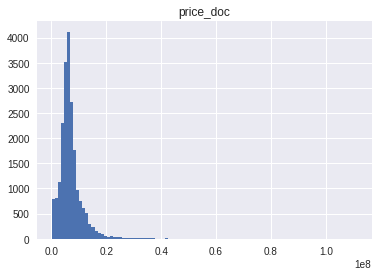

In [7]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b578765c0>]],
      dtype=object)

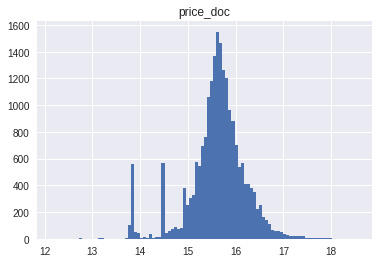

In [8]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

In [9]:
from sklearn.ensemble import RandomForestRegressor 

### BEGIN Solution
reg = RandomForestRegressor(random_state=322)
reg.fit(X_train, y_train_log)
### END Solution

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=322, verbose=0, warm_start=False)

Print the 20 most important features and their **values**.

In [10]:
### BEGIN Solution
importances = []
for i in range(X_train.shape[1]):
    importances.append([X_train.columns[i], reg.feature_importances_[i]])
importances = np.array(importances)
importances = importances[np.argsort(reg.feature_importances_)[::-1][:20]]
print(importances)
### END Solution

[['full_sq' '0.2489223402394932']
 ['sport_count_3000' '0.02808570775218188']
 ['cafe_count_5000_price_2500' '0.025825514393152692']
 ['cafe_count_3000' '0.021624182855524202']
 ['cafe_count_2000' '0.01044054948247989']
 ['micex_cbi_tr' '0.01034555292134117']
 ['swim_pool_km' '0.009256707076692999']
 ['exhibition_km' '0.009212001418361789']
 ['catering_km' '0.007149799530301371']
 ['additional_education_km' '0.007135261601035843']
 ['micex' '0.007059887734677453']
 ['floor' '0.006958369561364551']
 ['brent' '0.006888203499375195']
 ['eurrub' '0.0067528175722381765']
 ['cafe_count_5000' '0.006691785422897056']
 ['kindergarten_km' '0.0065453815337534835']
 ['green_zone_km' '0.006129088275741766']
 ['usdrub' '0.005972131891828707']
 ['cemetery_km' '0.005903497567615938']
 ['church_synagogue_km' '0.00589645012884179']]


<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [0]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error

def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators =100)
    }
    
### BEGIN Solution
    error_train = []
    error_test = []
    for method in methods:
        methods[method].fit(X_train, y_train)
        error_train.append(mean_squared_error(y_train, methods[method].predict(X_train))**0.5)
        error_test.append(mean_squared_error(y_test, methods[method].predict(X_test))**0.5)
    error_train = np.array(error_train)
    error_test = np.array(error_test)
### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [13]:
### BEGIN Solution
X_train_imp = X_train[importances[:, 0]]
X_test_imp = X_test[importances[:, 0]]
comparator(X_train_imp, y_train_log, X_test_imp, y_test_log)
### END Solution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Test loss,Train loss
0,Linear Regression,0.533301,0.545437
1,Lasso,0.562982,0.572694
2,Ridge,0.533301,0.545437
3,Dtree,0.668851,0.000558
4,RFR,0.474307,0.176686


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [0]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    for i, feature in enumerate(X.columns):
        if i in used_features:
            continue
        quality = np.mean(cross_val_score(model, X.iloc[:, [i] + used_features],
                                          y, cv=cv, n_jobs=-1,
                                          scoring=make_scorer(mean_squared_error)))
        quality = quality**0.5
        scores.update({i : quality})
    ### END Solution

    return scores

In [0]:
import operator

def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    max_features = X.shape[1]
    round = 0
    best_quality = np.inf
    while round < n_rounds:
      
        if(len(feat_best_list)== max_features):
            break
        
        scores = selection_step(method, X, y, used_features=feat_best_list)
        
        sorted_scores = sorted(scores.items(), key=operator.itemgetter(1))
        
        if(best_quality < sorted_scores[0][-1]):
            round += 1
        else:
            best_quality = sorted_scores[0][-1]
            round = 0
            feat_best_list.append(sorted_scores[0][0])
        
    ### END Solution
    
    return feat_best_list


Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [17]:
### BEGIN Solution
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state=322)
features = forward_steps(X, y, 3, reg)
for column in features:
    print(X.columns[column])
### END Solution

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


full_sq
ecology_no data
sub_area_Nekrasovka
sub_area_Hamovniki
mosque_count_1000
mosque_count_1500
ecology_good
sub_area_Presnenskoe
sub_area_Donskoe
sub_area_Zapadnoe Degunino
sub_area_Cheremushki
hot_water_share
sub_area_Poselenie Novofedorovskoe
sub_area_Birjulevo Vostochnoe
sub_area_Krylatskoe
sub_area_Gagarinskoe
sub_area_Troparevo-Nikulino
sub_area_Dorogomilovo


Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [18]:
### BEGIN Solution
print(len(features))
X_train_imp = X_train.iloc[:, features]
X_test_imp = X_test.iloc[:, features]
comparator(X_train_imp, y_train_log, X_test_imp, y_test_log)
### END Solution

18


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Test loss,Train loss
0,Linear Regression,0.544283,0.559485
1,Lasso,0.575925,0.586927
2,Ridge,0.544289,0.559487
3,Dtree,0.509952,0.445674
4,RFR,0.497346,0.449717


<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [0]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

In [20]:
### BEGIN Solution

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


class My_GB:
    def __init__(self, n_estimators=5 ,max_depth=3):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        
    def fit(self, X_train, y_train):
        gamma = np.ones(self.n_estimators)
        gamma[0] = 0.2
        gamma_val = np.linspace(start=-10, stop=10, num=100)
        func = []
        func.append(self.base_pred(X_train, y_train))
        for t in range(1, self.n_estimators):
            derivatives = -self.der_loss(X_train, y_train, func, gamma)
            reg = DecisionTreeRegressor(max_depth=self.max_depth)
            reg.fit(X_train, derivatives)
            func.append(reg.predict)
            gamma[t] = self.gamma_eval(X_train, y_train, func, gamma, gamma_val)
            
        self.func = func
        self.gamma = gamma
      
    def gamma_eval(self, X, y, func, gamma, gamma_val):
        common_part = np.zeros((X.shape[0], 1))
        for i, f in enumerate(func[:-1]):
            common_part = common_part +  gamma[i] * f(X).reshape(-1, 1)
        new_loss = np.empty_like(gamma_val)
        for i, g in enumerate(gamma_val):
            new_loss[i] = np.sum(np.log(1 + np.exp(-y * (common_part + g * func[-1](X).reshape(-1, 1)))))
        return gamma_val[np.argmin(new_loss)]
      
    def base_pred(self, X, y):
        return DecisionTreeRegressor(max_depth=self.max_depth).fit(X, y).predict

    def der_loss(self, X, y, func, gamma):
        prediction = np.zeros((X.shape[0], 1))
        for i, f in enumerate(func):
            prediction = prediction + gamma[i] * f(X).reshape(-1, 1)
        return  (-y * np.exp( -y * prediction)) / (1 + np.exp(-y * prediction))
      
    def predict(self, X):
        func = self.func
        gamma = self.gamma
        res = np.zeros((X.shape[0], 1))
        for i, f in enumerate(func):
            res = res +  gamma[i] * f(X).reshape(-1, 1)
        res[res<0] = -1
        res[res>=0] = 1
        return res.reshape(-1)

clf = My_GB(n_estimators=20, max_depth=1)
clf.fit(X_train, y_train)
print('Accuracy on train: ', accuracy_score(y_train, clf.predict(X_train)))
print('Accuracy on test: ', accuracy_score(y_test, clf.predict(X_test)))
print(classification_report(y_test, clf.predict(X_test)))
### END Solution

Accuracy on train:  0.9944444444444445
Accuracy on test:  0.9666666666666667
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        62
           1       0.97      0.97      0.97        58

   micro avg       0.97      0.97      0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



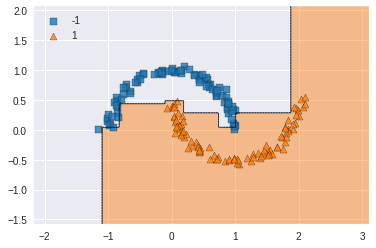

In [21]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.reshape(-1), clf=clf, legend=2);

<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

In [23]:
# !pip install catboost

    100% |████████████████████████████████| 55.5MB 552kB/s 


XGBoost
10 loops, best of 3: 55.7 ms per loop
LightGBM
10 loops, best of 3: 83.9 ms per loop
CatBoost
1 loop, best of 3: 41.9 s per loop
AUC for XGBClassifier 0.9937474290415467
AUC for LGBMClassifier 0.9912793089263678
AUC for CatBoostClassifier 0.9960510078157137


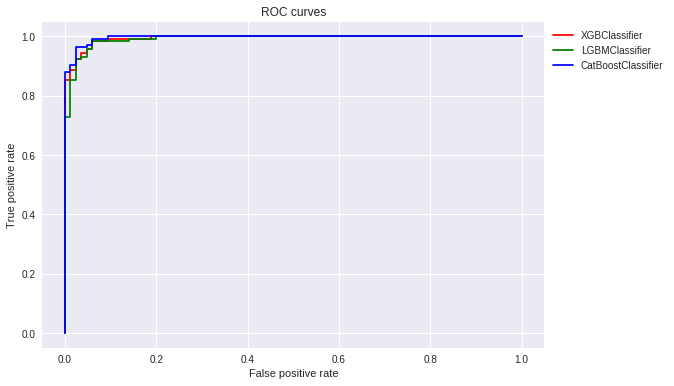

In [24]:
### BEGIN Solution
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('XGBoost')
%timeit XGBClassifier().fit(X_train, y_train)

print('LightGBM')
%timeit LGBMClassifier().fit(X_train, y_train)

print('CatBoost')
%timeit CatBoostClassifier(verbose=False).fit(X_train, y_train)

names = [XGBClassifier.__name__, LGBMClassifier.__name__, CatBoostClassifier.__name__]
colors = ['r', 'g', 'b']
# now let's draw different ROC curves
plt.figure(figsize=[9, 6])
for i, clf in enumerate([XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose=False)]):
    clf.fit(X_train, y_train)
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, colors[i], label=names[i])
    plt.legend(bbox_to_anchor=(0.999, 1))
    plt.title('ROC curves')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
    print('AUC for {}'.format(names[i]), roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

plt.show()
### END Solution

best accuracy score for CatBoostClassifier: 0.993494095964696
best parameters set for CatBoostClassifier: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'verbose': False}
best accuracy score for XGBClassifier: 0.9915377733982914
best parameters set for XGBClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50}
best accuracy score for LGBMClassifier: 0.9931629148369954
best parameters set for LGBMClassifier: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
AUC for XGBClassifier 0.9936651583710406
AUC for LGBMClassifier 0.9912793089263678
AUC for CatBoostClassifier 0.9965446318387494


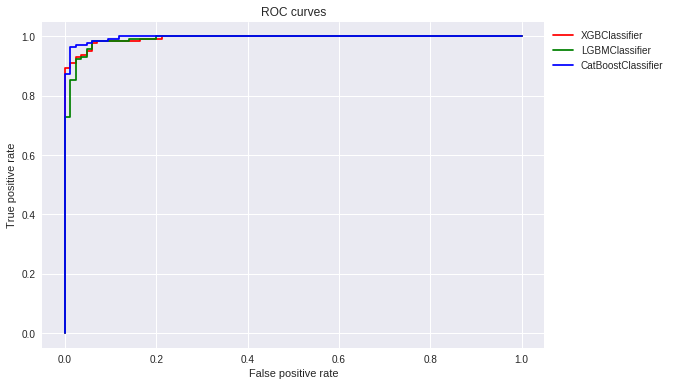

In [31]:
### BEGIN Solution
from sklearn.model_selection import GridSearchCV

clf1 = CatBoostClassifier()

clf1 = GridSearchCV(clf1,
                   {'max_depth': [5, 10], 'n_estimators': [50, 150], 'learning_rate': [0.1], 'verbose': [False]}, # not so many parameters because 1)some of them I have already checked
                   cv = 3, scoring='roc_auc') # and 2) it is extremely slow
clf1.fit(X_train, y_train)

print('best accuracy score for CatBoostClassifier:', clf1.best_score_) # validation score
print('best parameters set for CatBoostClassifier:', clf1.best_params_) 

clf2 = XGBClassifier()
  
clf2 = GridSearchCV(clf2,
                   {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 1]},
                   cv = 3, scoring='roc_auc')
clf2.fit(X_train, y_train)

print('best accuracy score for XGBClassifier:', clf2.best_score_) # validation score
print('best parameters set for XGBClassifier:', clf2.best_params_) 

clf3 = LGBMClassifier()
  
clf3 = GridSearchCV(clf3,
                   {'max_depth': [5, 10, 15], 'n_estimators': [50, 100, 150, 200], 'learning_rate': [0.1, 1]},
                   cv = 3, scoring='roc_auc')
clf3.fit(X_train, y_train)

print('best accuracy score for LGBMClassifier:', clf3.best_score_) # validation score
print('best parameters set for LGBMClassifier:', clf3.best_params_) 

names = [XGBClassifier.__name__, LGBMClassifier.__name__, CatBoostClassifier.__name__]
colors = ['r', 'g', 'b']
# now let's draw different ROC curves
plt.figure(figsize=[9, 6])
for i, clf in enumerate([clf2, clf3, clf1]):
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, colors[i], label=names[i])
    plt.legend(bbox_to_anchor=(0.999, 1))
    plt.title('ROC curves')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    print('AUC for {}'.format(names[i]), roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

plt.show()


### END Solution

<Figure size 648x432 with 0 Axes>

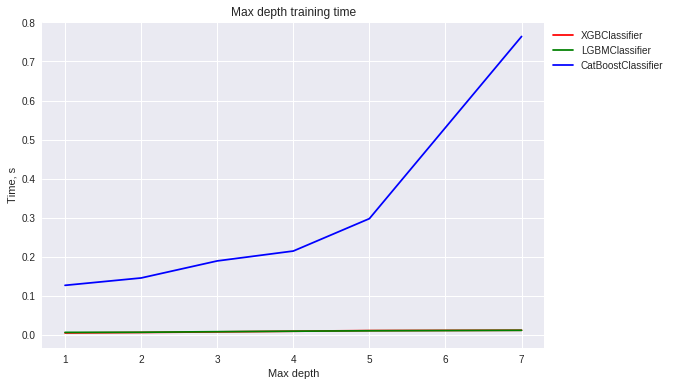

In [34]:
import time

names = [XGBClassifier.__name__, LGBMClassifier.__name__, CatBoostClassifier.__name__]
colors = ['r', 'g', 'b']
# now let's draw different ROC curves
plt.figure(figsize=[9, 6])

depths = [1, 2, 3, 4, 5, 7]
n_estimators = 10

catboost_depth = []
for max_depth in depths:
    clf = CatBoostClassifier(n_estimators=n_estimators, max_depth=max_depth, verbose = 0, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    catboost_depth.append(end - start)
    
xgb_depth = []
for max_depth in depths:
    clf = XGBClassifier(n_estimators = n_estimators, max_depth=max_depth, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    xgb_depth.append(end - start)
    
lgbm_depth = []
for max_depth in depths:
    clf = LGBMClassifier(n_estimators = n_estimators, max_depth=max_depth, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    lgbm_depth.append(end - start)
    
    
colors = ['r', 'g', 'b']
plt.figure(figsize=[9, 6])
for i, time_train in enumerate([xgb_depth, lgbm_depth, catboost_depth]):
    plt.plot(depths, time_train, colors[i], label=names[i])
    plt.legend(bbox_to_anchor=(0.999, 1))
    plt.title('Max depth training time')
    plt.xlabel('Max depth')
    plt.ylabel('Time, s')

plt.show()


<Figure size 648x432 with 0 Axes>

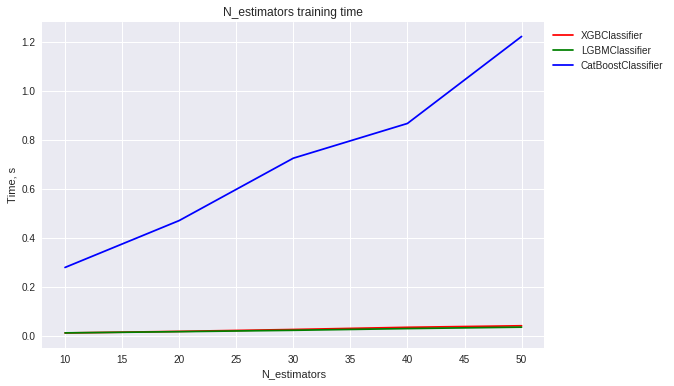

In [36]:
import time

names = [XGBClassifier.__name__, LGBMClassifier.__name__, CatBoostClassifier.__name__]
colors = ['r', 'g', 'b']
# now let's draw different ROC curves
plt.figure(figsize=[9, 6])

depths = 5
n_estimators = [10, 20, 30, 40, 50]

catboost_n = []
for n in n_estimators:
    clf = CatBoostClassifier(n_estimators=n, max_depth=depths, verbose = 0, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    catboost_n.append(end - start)
    
xgb_n = []
for n in n_estimators:
    clf = XGBClassifier(n_estimators = n, max_depth=depths, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    xgb_n.append(end - start)
    
lgbm_n = []
for n in n_estimators:
    clf = LGBMClassifier(n_estimators = n, max_depth=depths, learning_rate=0.1)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    lgbm_n.append(end - start)
    
    
colors = ['r', 'g', 'b']
plt.figure(figsize=[9, 6])
for i, time_train in enumerate([xgb_n, lgbm_n, catboost_n]):
    plt.plot(n_estimators, time_train, colors[i], label=names[i])
    plt.legend(bbox_to_anchor=(0.999, 1))
    plt.title('N_estimators training time')
    plt.xlabel('N_estimators')
    plt.ylabel('Time, s')

plt.show()


<br>

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

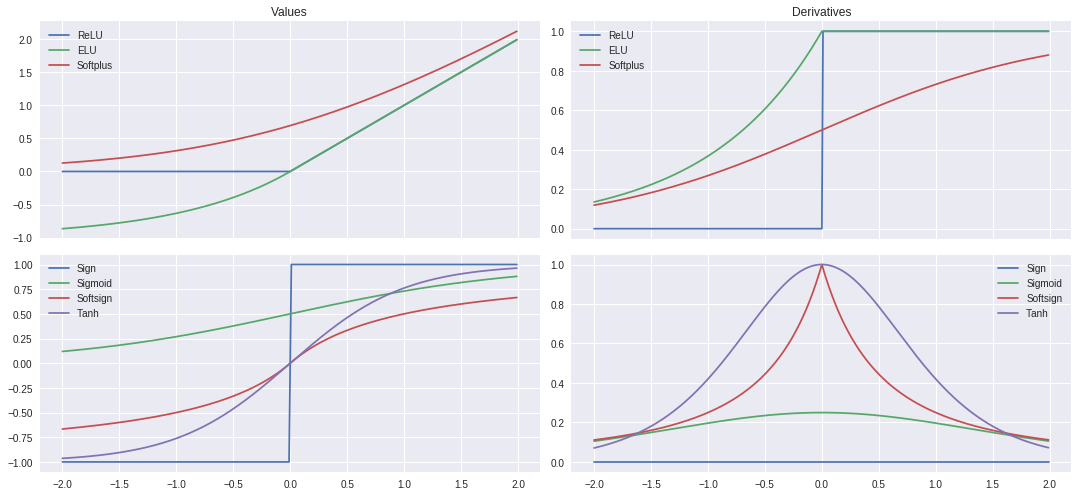

In [37]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        xs = torch.arange(-2, 2, .01, requires_grad=True)
        y = activation(input=xs)
        y.backward(gradient=x.grad)
        axes[i, 0].plot(np.arange(-2, 2, .01), y.detach().numpy(), label=function_name)
        axes[i, 1].plot(np.arange(-2, 2, .01), xs.grad.numpy(), label=function_name)
        # ...
        # axes[i, 0].plot('xs', 'funcion values', label=function_name)
        # axes[i, 1].plot('xs', 'derivative values', label=function_name)
        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

Those, which have sufficient non-zero gradient are ok, because NN will learn. For example the first three are good.

Second four are not good, since they have non-zero gradient only in a narrow vicinity of 0.

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [0]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [0]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.zeros_like(self.thetas)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.zeros_like(self.bias)


    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        # ... calculate grads
        input_grad = np.matmul(self.thetas, output_grad)

        self.thetas_grads += (x.reshape(-1, 1) * output_grad.reshape(1, -1))
        self.bias_grads += output_grad
        ### END Solution
        return input_grad 


class LogisticActivation:
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        input_grad = output_grad * self.forward(x) * (1 - self.forward(x))
        # ... calculate grads
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        a = self.forward(x)
        input_grad = a - output_grad
        # ... calculate grads
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    
    def forward(self, x):
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        first = self.linear1.forward(x)
        middle = self.activation1.forward(first)
        self.linear1.backward(x, self.activation1.backward(first ,self.linear2.backward(middle, output_grad)))
        # ... calculate and update grads
        ### END Solution

In [0]:
### BEGIN Solution
# Please, implement here everything else you need, like the loss function.
def loss_f(y_tr, y_pred):
    if(type(y_tr) is type(np.int64())):
        shape = 1
    else:
        shape = y_tr.shape[0]
    y_t = np.zeros((shape, 10))
    y_t[np.arange(shape), y_tr] = 1
    y_pred = y_pred.reshape(shape, 10)
    return np.sum( -y_t * safe_ln(y_pred)) / shape
  
def safe_ln(x):
    return np.ma.log(x).filled(0)
  
def y_onehot(y_tr):
    y_t = np.zeros(10)
    y_t[y_tr] = 1
    return y_t
  

### END Solution

Starting epoch 0 Starting epoch 10 Starting epoch 20 Starting epoch 30 Starting epoch 40 Starting epoch 50 Starting epoch 60 Starting epoch 70 Starting epoch 80 Starting epoch 90 Starting epoch 100 Starting epoch 110 Starting epoch 120 Starting epoch 130 Starting epoch 140 Starting epoch 150 Starting epoch 160 Starting epoch 170 Starting epoch 180 Starting epoch 190 

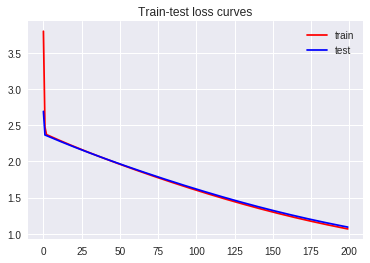

In [42]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch), end=' ')
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]
        

        ### BEGIN Solution
        # ... zero the gradients
        mlp.linear1.thetas_grads = np.zeros_like(mlp.linear1.thetas)
        mlp.linear1.bias_grads = np.zeros_like(mlp.linear1.bias)
        mlp.linear2.thetas_grads = np.zeros_like(mlp.linear2.thetas)
        mlp.linear2.bias_grads = np.zeros_like(mlp.linear2.bias)
        
        prediction = mlp.forward(x)
        
        loss = loss_f(target, SoftMaxActivation().forward(prediction))# use cross entropy loss
        learning_curve[epoch] += loss
        
        
        # ... perform backward pass
        soft_back = SoftMaxActivation().backward(prediction, y_onehot(target))
        mlp.backward(x, soft_back)
        
        # ... update the weights simply with weight -= grad * learning_rate
        mlp.linear1.thetas -= mlp.linear1.thetas_grads * learning_rate
        mlp.linear2.thetas -= mlp.linear2.thetas_grads * learning_rate
        mlp.linear1.bias -= mlp.linear1.bias_grads * learning_rate
        mlp.linear2.bias -= mlp.linear2.bias_grads * learning_rate
        
    
    learning_curve[epoch] /= train_size
    prediction = mlp.forward(x_test)
    loss = loss_f(y_test, SoftMaxActivation().forward(prediction))# use cross entropy loss
    test_curve[epoch] = loss
    ### END Solution
    
learning_curve = np.array(learning_curve).squeeze()

plt.title('Train-test loss curves')
plt.plot(learning_curve, 'r',label='train');
plt.plot(test_curve, 'b', label='test');
plt.legend()

In [43]:
predictions = np.argmax(SoftMaxActivation().forward(mlp.forward(digits)), -1)
pd.DataFrame(confusion_matrix(targets, predictions))

,0,1,2,3,4,5,6,7,8,9
0,174,0,0,0,2,1,1,0,0,0
1,0,140,6,2,4,1,2,9,3,15
2,0,2,167,2,0,0,0,3,0,3
3,2,1,1,160,0,4,0,7,0,8
4,0,0,2,0,176,0,0,3,0,0
5,0,0,1,0,3,160,1,0,0,17
6,1,1,0,0,3,0,176,0,0,0
7,0,0,0,0,0,2,0,176,0,1
8,1,38,19,13,2,6,5,8,77,5
9,0,2,0,4,6,3,0,10,0,155


### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [0]:
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import PIL.Image as Image
from torch import nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import transforms, utils

Make sure you are using the right device.

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


First take a look at the data.

In [47]:
# # This is for getting access to Google Drive
# # If you are going to run mine solution on your computer, just skip this cell and uncomment the next one
# from google.colab import drive
# drive.mount('/content/gdrive')
# dt = pd.read_csv(r'/content/gdrive/My Drive/hw_ml/hw2/data/cats_dogs/train.csv')
# dt.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,path,y
0,cats_dogs/train/dogs/dog.342.jpg,1
1,cats_dogs/train/cats/cat.661.jpg,0
2,cats_dogs/train/cats/cat.516.jpg,0
3,cats_dogs/train/dogs/dog.938.jpg,1
4,cats_dogs/train/cats/cat.224.jpg,0


In [0]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

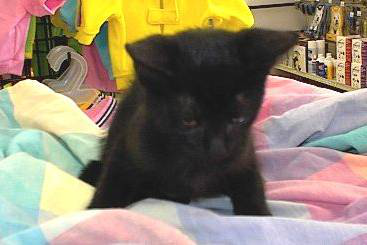

In [48]:
# Image.open('/content/gdrive/My Drive/hw_ml/hw2/data/' + dt['path'].iloc[1])
Image.open('data/' + dt['path'].iloc[1])

Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [0]:
#Change class name 
class My_dataset(Dataset):
    """ Some documantation"""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
        """
        ### BEGIN Solution
        # ... here you can load and initialize what you will need next
        self.dataset = csv_file
        self.root_dir = root_dir
        self.transform = transform
        ### END Solution
       

    def __getitem__(self, idx):
        ### BEGIN Solution
        # ... don't forget to augment your data for training, using the `transform` parameter of the constructor
        img = Image.open(self.root_dir + self.dataset['path'].iloc[idx])
        if self.transform is not None:
            img = self.transform(img)
        
        y = self.dataset['y'][idx]
        ### END Solution
        return img, torch.tensor(y)
    
    
    def __len__(self):
        ### BEGIN Solution
        # ... 
        return self.dataset.shape[0]
        ### END Solution

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [0]:
img_size = 150
batch_size = 64

data_transform = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ToTensor()
])

data_transform_train = transforms.Compose([
    transforms.Resize((img_size, img_size)),
    transforms.ColorJitter(hue=.05, saturation=.05),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20, resample=Image.BILINEAR),
    transforms.ToTensor()])

# ### BEGIN Solution
# dt = pd.read_csv(r'/content/gdrive/My Drive/hw_ml/hw2/data/cats_dogs/train.csv')
# dv = pd.read_csv(r'/content/gdrive/My Drive/hw_ml/hw2/data/cats_dogs/validation.csv')
# root_dir = '/content/gdrive/My Drive/hw_ml/hw2/data/'
dt = pd.read_csv(r'./data/cats_dogs/train.csv')
dv = pd.read_csv(r'./data/cats_dogs/validation.csv')
root_dir = './data/'


dataset_train = My_dataset(dt, root_dir, transform=data_transform_train) 
dataset_val = My_dataset(dv, root_dir, transform=data_transform)

train_loader = torch.utils.data.DataLoader(dataset_train, shuffle=True, batch_size=batch_size, num_workers=4)

val_loader = torch.utils.data.DataLoader(dataset_val, shuffle=True, batch_size=batch_size, num_workers=4)


### END Solution

Make sure that dataloader works as expected by observing one sample from it.

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
torch.Size([64, 3, 150, 150])
torch.Size([3, 150, 150])
tensor(0)


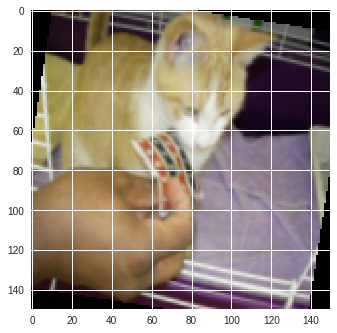

In [7]:
for X,y in train_loader:
    print(X[0])
    print(X.shape)
    print(X[0].shape)
    print(y[0])
    plt.imshow(np.transpose(np.array(X[0,:,:,:]), (1, 2, 0)))
    break

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [0]:
class CatDog(nn.Module):  ## <---
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        
        # convolutional feature extractor
        self.stage1 = nn.Sequential( #150
            nn.Conv2d(in_channels=inp_ch, out_channels=16, kernel_size=3), #148
            nn.BatchNorm2d(16),   ## <---
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2))  #74
        
        self.stage2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), #72
            nn.BatchNorm2d(32),  ## <---
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)) # 36
        
        self.stage3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), #34
            nn.BatchNorm2d(64),  ## <---
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)) # 17
        
        # fully-connected classifier
        self.fc = nn.Sequential(
            nn.Linear(64 * 17 * 17, 512),
            nn.BatchNorm1d(512), 
            nn.ReLU(),
            nn.Linear(512, outp_ch))


    def forward(self, x):
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.fc(x.view(-1, 64 * 17 * 17))
        return x.squeeze()

Send your model to GPU, if you have it.

In [0]:
model = CatDog(inp_ch=3, outp_ch=2).to(device)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [0]:
### BEGIN Solution
criterion = torch.nn.CrossEntropyLoss()
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

In [0]:
### BEGIN Solution
cnn = CatDog(inp_ch=3, outp_ch=2)
optimizer = torch.optim.SGD(cnn.parameters(), lr=.1, momentum=0.9)  ## <---
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

In [0]:
### BEGIN Solution
from tqdm import trange
from IPython import display

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device('cpu')

train_size = dt.shape[0]
def get_accuracy(model, dataloader, device=device):
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)  ## <---
            y = y.to(device)  ## <---
            prediction = model(x).argmax(dim=-1, keepdim=True)
            correct += prediction.eq(y.view_as(prediction)).sum().item()
    return correct / len(dataloader.dataset)

  
def train(model, optimizer, PATH, scheduler=None, epochs_n=100):  ## <---
    model.to(device)
    criterion = torch.nn.CrossEntropyLoss()
    learning_curve = [np.nan] * epochs_n
    train_accuracy_curve = [np.nan] * epochs_n
    val_accuracy_curve = [np.nan] * epochs_n
    max_val_accuracy = 0
    max_val_accuracy_epoch = 0

    batches_n = (train_size - 1) // batch_size + 1

    for epoch in trange(epochs_n):
        if scheduler is not None:  ## <---
            scheduler.step()       ## <---
        model.train()

        learning_curve[epoch] = 0
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            prediction = model(x)
            loss = criterion(prediction, y)
            learning_curve[epoch] += loss.item()
            loss.backward()
            optimizer.step()

        display.clear_output(wait=True)
        f, axes = plt.subplots(1, 2, figsize=(15, 3))

        learning_curve[epoch] /= batches_n
        axes[0].plot(learning_curve)

        model.eval()
        train_accuracy_curve[epoch] = get_accuracy(model, train_loader, device)
        val_accuracy_curve[epoch] = get_accuracy(model, val_loader, device)
        
        val_accuracy = val_accuracy_curve[epoch]
        if val_accuracy > max_val_accuracy:
            max_val_accuracy = val_accuracy
            max_val_accuracy_epoch = epoch
            torch.save(model, PATH)
        
        axes[1].set_title('Train {:.4f}, val {:.4f}, max val {:.4f} at {}'.format(
            train_accuracy_curve[epoch], val_accuracy, max_val_accuracy, max_val_accuracy_epoch))
        axes[1].plot(train_accuracy_curve)
        axes[1].plot(val_accuracy_curve)

        plt.tight_layout()
        plt.show()
### END Solution

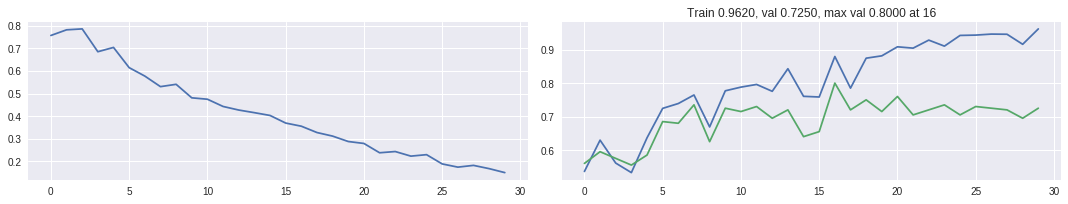

100%|██████████| 30/30 [56:03<00:00, 108.91s/it]


In [13]:
# scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, (10, 15, ), gamma=.1)  ## <---
# train(cnn, optimizer, epochs_n=30, PATH='/content/gdrive/My Drive/hw_ml/hw2/model/my_best_model.pt')
train(cnn, optimizer, epochs_n=30, PATH='./model/my_best_model.pt')

In [18]:
# model_loaded = torch.load('/content/gdrive/My Drive/hw_ml/hw2/model/my_best_model.pt')
model_loaded = torch.load('./my_best_model.pt')
model_loaded.eval()

CatDog(
  (stage1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (stage2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (stage3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=18496, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [20]:
print('train accuracy: ', get_accuracy(model_loaded, train_loader, device))
print('validation accuracy: ', get_accuracy(model_loaded, val_loader, device))

train accuracy:  0.8815
validation accuracy:  0.8


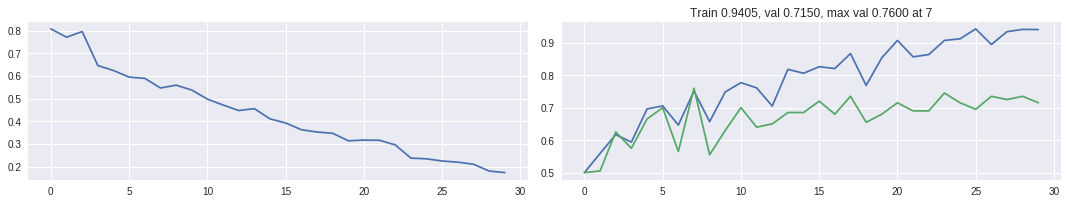


100%|██████████| 30/30 [52:21<00:00, 103.05s/it]


In [22]:
#SGD with learning rate scheduler
cnn = CatDog(inp_ch=3, outp_ch=2)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, (10, 15, ), gamma=.1)  ## <---
optimizer = torch.optim.SGD(cnn.parameters(), lr=.1, momentum=0.9)  ## <---
# train(cnn, optimizer, scheduler=scheduler, epochs_n=30, PATH='/content/gdrive/My Drive/hw_ml/hw2/model/my_model_scheduler.pt')
train(cnn, optimizer, scheduler=scheduler, epochs_n=30, PATH='./model/my_model_scheduler.pt')

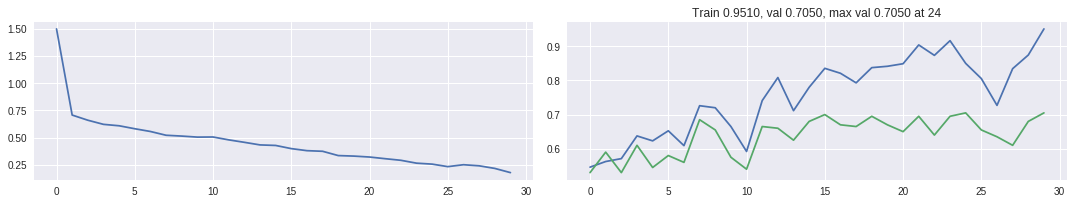

100%|██████████| 30/30 [53:17<00:00, 108.60s/it]


In [16]:
#Now let us try Adagrad
cnn = CatDog(inp_ch=3, outp_ch=2)
optimizer = torch.optim.Adagrad(cnn.parameters(), lr=.1)  ## <---
# train(cnn, optimizer, epochs_n=30, PATH='/content/gdrive/My Drive/hw_ml/hw2/model/my_adagrad_model.pt')
train(cnn, optimizer, epochs_n=30, PATH='./model/my_adagrad_model.pt')

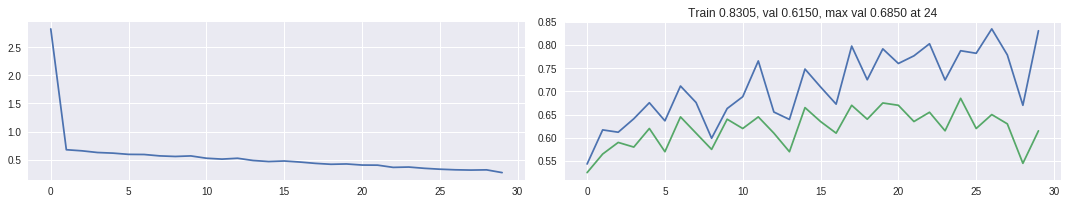

100%|██████████| 30/30 [53:54<00:00, 107.77s/it]


In [17]:
# Adagrad with another lr
cnn = CatDog(inp_ch=3, outp_ch=2)
optimizer = torch.optim.Adagrad(cnn.parameters(), lr=.3)  ## <---
# train(cnn, optimizer, epochs_n=30, PATH='/content/gdrive/My Drive/hw_ml/hw2/model/my_adagrad_model.pt')
train(cnn, optimizer, epochs_n=30, PATH='./model/my_adagrad_model.pt')

I chosen 2 different optimizers - SGD and Adagrad. The first optimizer worked better. I tried two cases - with scheduler and without. For the second case I obtained my best result. And since difference between accuracy on train and test is not very big, we can assume that we didnt overfit our network. But since accuracy on train is not huge, we might underfit our NN. When I tried SGD with scheduler which decreased lr, underfitting was obvious.

I decided to use something more complicated that SGD and choosen Adagrad. But for choosen lr it did not provide a good result.

### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.

In [0]:
# Replace ReLu with sigmoid

In [0]:
class CatDog_weak(nn.Module):  ## <---
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        
        # convolutional feature extractor
        self.stage1 = nn.Sequential( #150
            nn.Conv2d(in_channels=inp_ch, out_channels=16, kernel_size=3), #148
            nn.BatchNorm2d(16),   ## <---
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2))  #74
        
        self.stage2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3), #72
            nn.BatchNorm2d(32),  ## <---
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2)) # 36
        
        self.stage3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3), #34
            nn.BatchNorm2d(64),  ## <---
            nn.Sigmoid(),
            nn.MaxPool2d(kernel_size=2)) # 17
        
        # fully-connected classifier
        self.fc = nn.Sequential(
            nn.Linear(64 * 17 * 17, 512),
            nn.BatchNorm1d(512),  ## <---
            nn.Sigmoid(),
            nn.Linear(512, outp_ch))


    def forward(self, x):
        x = self.stage1(x)
        x = self.stage2(x)
        x = self.stage3(x)
        x = self.fc(x.view(-1, 64 * 17 * 17))
        return x.squeeze()

In [0]:
model_weak = CatDog_weak(inp_ch=3, outp_ch=2).to(device)

In [0]:
criterion = torch.nn.CrossEntropyLoss()

In [0]:
cnn = CatDog_weak(inp_ch=3, outp_ch=2)
optimizer = torch.optim.SGD(cnn.parameters(), lr=.1, momentum=0.9)  ## <---

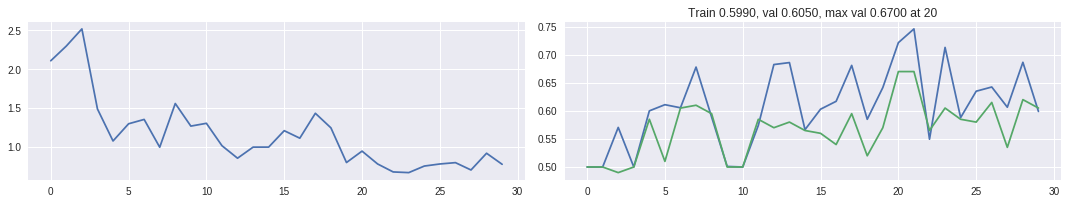


100%|██████████| 30/30 [56:55<00:00, 112.82s/it]


In [28]:
# train(cnn, optimizer, epochs_n=30, PATH='/content/gdrive/My Drive/hw_ml/hw2/model/my_weak_model.pt')
train(cnn, optimizer, epochs_n=30, PATH='./model/my_weak_model.pt')

## So we can see that because of small gradient of loss after each activation, finally it drastically decreses backprop gradient for first layers, and learning process
## becomes very slow. It is called vanishing gradient problem.